17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 6s 115ms/step - loss: 0.5156 - accuracy: 0.7836 - val_loss: 0.3929 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3172 - accuracy: 0.8966 - val_loss: 0.3257 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2390 - accuracy: 0.9205 - val_loss: 0.2958 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1940 - accuracy: 0.9341 - val_loss: 0.2742 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1582 - accuracy: 0.9488 - val_loss: 0.2754 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1341 - accuracy: 0.9568 - val_loss: 0.2897 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1174 - accura

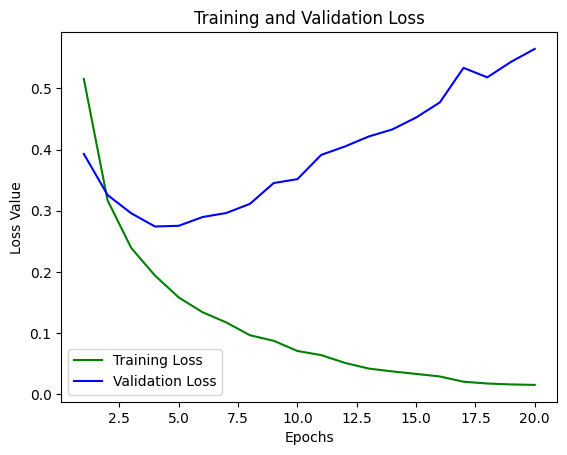

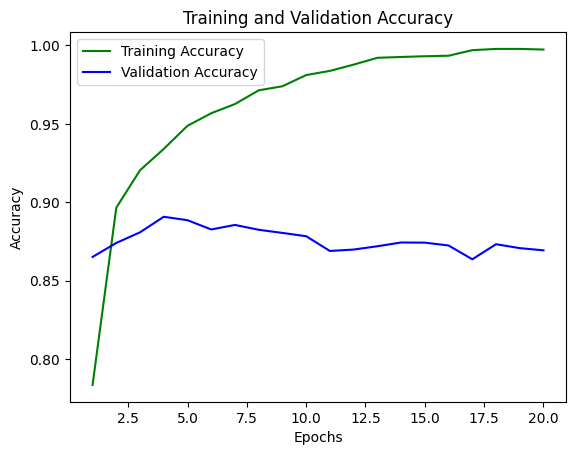

Epoch 1/3
30/30 [==============================] - 2s 66ms/step - loss: 0.0090 - accuracy: 0.9993 - val_loss: 0.7055 - val_accuracy: 0.8476
Epoch 2/3
30/30 [==============================] - 1s 35ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.6824 - val_accuracy: 0.8619
Epoch 3/3
782/782 [==============================] - 2s 2ms/step


In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt

# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorize sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Model definition
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Validation data
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Model training
history = model.fit(partial_X_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(X_val, y_val))

# Plotting training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plotting training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training for additional epochs
model.fit(partial_X_train, partial_y_train,
          epochs=3, batch_size=512,
          validation_data=(X_val, y_val))

# Making predictions
result = model.predict(X_test)
y_pred = np.round(result)

np.set_printoptions(suppress=True)
result = model.predict(X_test)

result

# Evaluating predictions
mae = metrics.mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)


